In [5]:
#pip install matplotlib seaborn
#!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [7]:
file_name = "Disease_Data.csv"

In [8]:
df = pd.read_csv(file_name, sep = ';')

pd.set_option('display.max_columns', None)
df.head(20)

C:\Users\kidal\AppData\Local\Temp\ipykernel_21888\3129217793.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep = ';')


,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
0,NVSS~2000~1~NV001~OVR01~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000","508,2","508,2",NaN,NaN,"508,2","508,2",Overall,Overall,C1,T1,NV001,AgeStdz,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
1,NVSS~2000~1~NV001~OVR01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","525,6","525,6",NaN,NaN,"525,6","525,6",Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
2,NVSS~2000~1~NV001~GEN01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","514,9","514,9",NaN,NaN,"514,9","514,9",Gender,Male,C1,T1,NV001,Crude,BOC02,GEN01,1,POINT (-86.63186076 32.84057112)
3,NVSS~2000~1~NV001~GEN01~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000","550,4","550,4",NaN,NaN,"550,4","550,4",Gender,Male,C1,T1,NV001,AgeStdz,BOC02,GEN01,1,POINT (-86.63186076 32.84057112)
4,NVSS~2000~1~NV001~GEN02~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000","471,7","471,7",NaN,NaN,"471,7","471,7",Gender,Female,C1,T1,NV001,AgeStdz,BOC02,GEN02,1,POINT (-86.63186076 32.84057112)
5,NVSS~2000~1~NV001~GEN02~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","535,3","535,3",NaN,NaN,"535,3","535,3",Gender,Female,C1,T1,NV001,Crude,BOC02,GEN02,1,POINT (-86.63186076 32.84057112)
6,NVSS~2000~1~NV001~AGE01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","5,4","5,4",NaN,NaN,"5,3",8,Age,18-24,C1,T1,NV001,Crude,BOC03,AGE01,1,POINT (-86.63186076 32.84057112)
7,NVSS~2000~1~NV001~AGE04~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","38,2","38,2",NaN,NaN,"38,1","38,3",Age,25-44,C1,T1,NV001,Crude,BOC03,AGE04,1,POINT (-86.63186076 32.84057112)
8,NVSS~2000~1~NV001~AGE05~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","273,4","273,4",NaN,NaN,"273,4","273,4",Age,45-64,C1,T1,NV001,Crude,BOC03,AGE05,1,POINT (-86.63186076 32.84057112)
9,NVSS~2000~1~NV001~AGE06~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000","2.442,8","2.442,8",NaN,NaN,"2.442,8","2.442,8",Age,65,C1,T1,NV001,Crude,BOC03,AGE06,1,POINT (-86.63186076 32.84057112)


In [9]:
df.Data_Value_Unit.unique()

array(['Rate per 100,000'], dtype=object)

In [10]:
df.Break_Out.unique()

array(['Overall', 'Male', 'Female', '18-24', '25-44', '45-64', '65', '35',
       '75', 'Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic',
       'Other'], dtype=object)

In [11]:
df.BreakOutId.unique()

array(['OVR01', 'GEN01', 'GEN02', 'AGE01', 'AGE04', 'AGE05', 'AGE06',
       'AGE07', 'AGE08', 'RAC01', 'RAC02', 'RAC04', 'RAC07'], dtype=object)

In [12]:
df.Break_Out_Category.value_counts()

Break_Out_Category
Race       69888
Age        52416
Gender     34944
Overall    17472
Name: count, dtype: int64

In [13]:
df.YearStart.value_counts()

YearStart
2000    8320
2011    8320
2019    8320
2018    8320
2017    8320
2016    8320
2015    8320
2014    8320
2013    8320
2012    8320
2010    8320
2001    8320
2009    8320
2008    8320
2007    8320
2006    8320
2005    8320
2004    8320
2003    8320
2002    8320
2020    8320
Name: count, dtype: int64

In [14]:
df.isna().sum()

RowId                              0
YearStart                          0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
PriorityArea1                 131040
PriorityArea2                 174720
PriorityArea3                 131040
PriorityArea4                 174720
Class                              0
Topic                              0
Question                           0
Data_Value_Type                    0
Data_Value_Unit                    0
Data_Value                     31630
Data_Value_Alt                     0
Data_Value_Footnote_Symbol    143090
Data_Value_Footnote           143090
Low_Confidence_Limit           31630
High_Confidence_Limit          31630
Break_Out_Category                 0
Break_Out                          0
ClassId                            0
TopicId                            0
QuestionId                         0
Data_Value_TypeID                  0
BreakOutCategoryId                 0
B

In [15]:
df.dtypes

RowId                          object
YearStart                       int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
PriorityArea1                  object
PriorityArea2                 float64
PriorityArea3                  object
PriorityArea4                 float64
Class                          object
Topic                          object
Question                       object
Data_Value_Type                object
Data_Value_Unit                object
Data_Value                     object
Data_Value_Alt                 object
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit           object
High_Confidence_Limit          object
Break_Out_Category             object
Break_Out                      object
ClassId                        object
TopicId                        object
QuestionId                     object
Data_Value_TypeID              object
BreakOutCate

In [16]:
#df = df.drop(df[df['Break_Out_Category'] == 'Race'].index) 
#df = df.drop(df[df['Break_Out_Category'] == 'Gender'].index) 
#df = df.drop(df[df['Data_Value_Type'] == 'Age-Standardized'].index) 

In [17]:
df = df.drop(df[df['Data_Value'] == ''].index) 
df = df.drop(df[df['Data_Value_Alt'] == ''].index) 
df.dropna(subset=['Data_Value'], inplace=True)

In [18]:
df['Data_Value'] = df['Data_Value'].str.replace(',','')
df['Data_Value_Alt'] = df['Data_Value_Alt'].str.replace(',','')

df['Data_Value'] = df['Data_Value'].astype(float)
df['Data_Value_Alt'] = df['Data_Value_Alt'].astype(float)

In [19]:
df.shape

(143090, 30)

In [20]:
columns = df.columns.to_list()
columns

['RowId',
 'YearStart',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'PriorityArea1',
 'PriorityArea2',
 'PriorityArea3',
 'PriorityArea4',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Type',
 'Data_Value_Unit',
 'Data_Value',
 'Data_Value_Alt',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'Break_Out_Category',
 'Break_Out',
 'ClassId',
 'TopicId',
 'QuestionId',
 'Data_Value_TypeID',
 'BreakOutCategoryId',
 'BreakOutId',
 'LocationId',
 'Geolocation']

In [21]:
df.isna().sum()

RowId                              0
YearStart                          0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
PriorityArea1                 107561
PriorityArea2                 143090
PriorityArea3                 105975
PriorityArea4                 143090
Class                              0
Topic                              0
Question                           0
Data_Value_Type                    0
Data_Value_Unit                    0
Data_Value                         0
Data_Value_Alt                     0
Data_Value_Footnote_Symbol    143090
Data_Value_Footnote           143090
Low_Confidence_Limit               0
High_Confidence_Limit              0
Break_Out_Category                 0
Break_Out                          0
ClassId                            0
TopicId                            0
QuestionId                         0
Data_Value_TypeID                  0
BreakOutCategoryId                 0
B

In [22]:
df.drop_duplicates()

,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,Geolocation
0,NVSS~2000~1~NV001~OVR01~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000",5082.0,5082.0,NaN,NaN,"508,2","508,2",Overall,Overall,C1,T1,NV001,AgeStdz,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
1,NVSS~2000~1~NV001~OVR01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",5256.0,5256.0,NaN,NaN,"525,6","525,6",Overall,Overall,C1,T1,NV001,Crude,BOC01,OVR01,1,POINT (-86.63186076 32.84057112)
2,NVSS~2000~1~NV001~GEN01~Crude,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Crude,"Rate per 100,000",5149.0,5149.0,NaN,NaN,"514,9","514,9",Gender,Male,C1,T1,NV001,Crude,BOC02,GEN01,1,POINT (-86.63186076 32.84057112)
3,NVSS~2000~1~NV001~GEN01~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000",5504.0,5504.0,NaN,NaN,"550,4","550,4",Gender,Male,C1,T1,NV001,AgeStdz,BOC02,GEN01,1,POINT (-86.63186076 32.84057112)
4,NVSS~2000~1~NV001~GEN02~Age-Standardized,2000,AL,Alabama,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease mortality rate am...,Age-Standardized,"Rate per 100,000",4717.0,4717.0,NaN,NaN,"471,7","471,7",Gender,Female,C1,T1,NV001,AgeStdz,BOC02,GEN02,1,POINT (-86.63186076 32.84057112)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174715,NVSS~2020~59~NV008~RAC02~Crude,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Crude,"Rate per 100,000",150.0,15.0,NaN,NaN,15,15,Race,Non-Hispanic Black,C1,T6,NV008,Crude,BOC04,RAC02,59,NaN
174716,NVSS~2020~59~NV008~RAC04~Crude,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Crude,"Rate per 100,000",84.0,84.0,NaN,NaN,"8,4","8,4",Race,Hispanic,C1,T6,NV008,Crude,BOC04,RAC04,59,NaN
174717,NVSS~2020~59~NV008~RAC04~Age-Standardized,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Age-Standardized,"Rate per 100,000",102.0,102.0,NaN,NaN,"10,2","10,2",Race,Hispanic,C1,T6,NV008,AgeStdz,BOC04,RAC04,59,NaN
174718,NVSS~2020~59~NV008~RAC07~Age-Standardized,2020,US,United States,NVSS,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,Hemorrhagic stroke mortality rate among US adu...,Age-Standardized,"Rate per 100,000",116.0,116.0,NaN,NaN,"11,6","11,6",Race,Other,C1,T6,NV008,AgeStdz,BOC04,RAC07,59,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143090 entries, 0 to 174719
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       143090 non-null  object 
 1   YearStart                   143090 non-null  int64  
 2   LocationAbbr                143090 non-null  object 
 3   LocationDesc                143090 non-null  object 
 4   DataSource                  143090 non-null  object 
 5   PriorityArea1               35529 non-null   object 
 6   PriorityArea2               0 non-null       float64
 7   PriorityArea3               37115 non-null   object 
 8   PriorityArea4               0 non-null       float64
 9   Class                       143090 non-null  object 
 10  Topic                       143090 non-null  object 
 11  Question                    143090 non-null  object 
 12  Data_Value_Type             143090 non-null  object 
 13  Data_Value_Unit    

df.columns()

In [24]:
#df.plot_scatter('YearStart', 'Data_Value')
#df.plot.scatter(x='YearStart', y='Data_Value')
#plt.scatter(df.col1, df.col2, s=df.col3)
#plt.xlabel('YearStart')
#plt.ylabel('Data_Value')
#plt.title('Cardiovascular Disease')
#plt.show()#

In [25]:
#plt.hexbin(df['YearStart'], df['Data_Value'], gridsize=30, cmap='Blues')
#plt.colorbar(label='Count')
#plt.xlabel('YearStart')
#plt.ylabel('Data_Value')
#plt.title('Cardiovascular Disease')
#plt.show()

In [26]:
#plt.plot(df['YearStart'], df['Data_Value'])
#plt.xlabel('YearStart')
#plt.ylabel('Data_Value')
##plt.title('Cardiovascular Disease')
#plt.show()

In [27]:
# Convert YearStart to a categorical type for proper grouping
#df['YearStart'] = df['YearStart'].astype('category')

# Box plot
#plt.figure(figsize=(12, 8))
#sns.boxplot(x='YearStart', y='Data_Value', data=df)
#plt.xlabel('YearStart')
#plt.ylabel('Data Value')
#plt.title('Cardiovascular Disease')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#plt.show()

In [28]:
#plt.hexbin(df['YearStart'], df['Data_Value'], gridsize=30, cmap='Blues')
#plt.colorbar(label='Count')
#plt.xlabel('YearStart')
#plt.ylabel('Data_Value')
#plt.title('Cardiovascular Disease')
#plt.show()

In [29]:
#sns.pairplot(df)
#plt.suptitle('Pair Plot of YearStart and Data_Value', y=1.02)
#plt.show()

In [30]:
df.columns

Index(['RowId', 'YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4',
       'Class', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Break_Out_Category', 'Break_Out', 'ClassId', 'TopicId', 'QuestionId',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationId',
       'Geolocation'],
      dtype='object')

In [31]:
df.to_csv('original_dataset_backup.csv', index=False)

In [32]:
columns_to_drop = ['RowId', 'LocationDesc', 'DataSource', 'PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Question', 
                   'Data_Value_Type', 'Data_Value_Unit', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 
                   'Low_Confidence_Limit', 'High_Confidence_Limit', 'ClassId', 'TopicId', 'QuestionId',  'BreakOutCategoryId', 'BreakOutId', 'Geolocation', 'LocationId']

In [33]:
df = df.drop(columns=columns_to_drop)

In [34]:
df.columns

Index(['YearStart', 'LocationAbbr', 'Class', 'Topic', 'Data_Value',
       'Break_Out_Category', 'Break_Out', 'Data_Value_TypeID'],
      dtype='object')

In [35]:
#remaining columns 'YearStart', 'LocationAbbr', 'LocationDesc', 'Class', 'Topic', 'Data_Value',  'Break_Out_Category', 'Break_Out', 'Data_Value_TypeID', 'LocationId'

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143090 entries, 0 to 174719
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YearStart           143090 non-null  int64  
 1   LocationAbbr        143090 non-null  object 
 2   Class               143090 non-null  object 
 3   Topic               143090 non-null  object 
 4   Data_Value          143090 non-null  float64
 5   Break_Out_Category  143090 non-null  object 
 6   Break_Out           143090 non-null  object 
 7   Data_Value_TypeID   143090 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.8+ MB


In [37]:
df.tail(40)

,YearStart,LocationAbbr,Class,Topic,Data_Value,Break_Out_Category,Break_Out,Data_Value_TypeID
174670,2020,WI,Cardiovascular Diseases,Stroke,189.0,Age,35,Crude
174671,2020,WI,Cardiovascular Diseases,Stroke,807.0,Age,75,Crude
174672,2020,WI,Cardiovascular Diseases,Stroke,142.0,Race,Non-Hispanic White,Crude
174673,2020,WI,Cardiovascular Diseases,Stroke,101.0,Race,Non-Hispanic White,AgeStdz
174674,2020,WI,Cardiovascular Diseases,Stroke,169.0,Race,Non-Hispanic Black,AgeStdz
174675,2020,WI,Cardiovascular Diseases,Stroke,144.0,Race,Non-Hispanic Black,Crude
174678,2020,WI,Cardiovascular Diseases,Stroke,188.0,Race,Other,AgeStdz
174679,2020,WI,Cardiovascular Diseases,Stroke,145.0,Race,Other,Crude
174680,2020,WY,Cardiovascular Diseases,Stroke,142.0,Overall,Overall,Crude
174681,2020,WY,Cardiovascular Diseases,Stroke,110.0,Overall,Overall,AgeStdz


In [38]:
df.dtypes

YearStart               int64
LocationAbbr           object
Class                  object
Topic                  object
Data_Value            float64
Break_Out_Category     object
Break_Out              object
Data_Value_TypeID      object
dtype: object

In [39]:
#filtered_df = df[df['YearStart'] >= 2010]
filtered_df = df[(df['Data_Value_TypeID'] == 'Crude')]

In [40]:
filtered_mcd_df = filtered_df[df['Topic'] == 'Major Cardiovascular Disease']

C:\Users\kidal\AppData\Local\Temp\ipykernel_21888\2225853353.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_mcd_df = filtered_df[df['Topic'] == 'Major Cardiovascular Disease']


In [41]:
filtered_mcd_df.head(30)

,YearStart,LocationAbbr,Class,Topic,Data_Value,Break_Out_Category,Break_Out,Data_Value_TypeID
1,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5256.0000,Overall,Overall,Crude
2,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5149.0000,Gender,Male,Crude
5,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5353.0000,Gender,Female,Crude
6,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,54.0000,Age,18-24,Crude
7,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,382.0000,Age,25-44,Crude
8,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,2734.0000,Age,45-64,Crude
9,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,2.4428,Age,65,Crude
10,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,7597.0000,Age,35,Crude
11,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,4.1067,Age,75,Crude
12,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5496.0000,Race,Non-Hispanic White,Crude


In [42]:
filtered_mcd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13120 entries, 1 to 21838
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearStart           13120 non-null  int64  
 1   LocationAbbr        13120 non-null  object 
 2   Class               13120 non-null  object 
 3   Topic               13120 non-null  object 
 4   Data_Value          13120 non-null  float64
 5   Break_Out_Category  13120 non-null  object 
 6   Break_Out           13120 non-null  object 
 7   Data_Value_TypeID   13120 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 922.5+ KB


In [43]:
filtered_mcd_df.Break_Out_Category.value_counts()

Break_Out_Category
Age        5898
Race       3946
Gender     2184
Overall    1092
Name: count, dtype: int64

In [44]:
age_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Age']

C:\Users\kidal\AppData\Local\Temp\ipykernel_21888\2671235090.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Age']


In [45]:
overall_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Overall']

C:\Users\kidal\AppData\Local\Temp\ipykernel_21888\3231300722.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  overall_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Overall']


In [46]:
gender_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Gender']

C:\Users\kidal\AppData\Local\Temp\ipykernel_21888\3448589801.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Gender']


In [47]:
race_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Race']

C:\Users\kidal\AppData\Local\Temp\ipykernel_21888\54098473.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  race_filtered_df = filtered_mcd_df[df['Break_Out_Category'] == 'Race']


In [48]:
age_filtered_df.to_csv('age_filtered.csv.gz', index=False, compression='gzip') 
overall_filtered_df.to_csv('age_filtered_overall.csv.gz', index=False, compression='gzip')
gender_filtered_df.to_csv('gender_filtered.csv.gz', index=False, compression='gzip')
race_filtered_df.to_csv('race_filtered.csv.gz', index=False, compression='gzip')
 

In [65]:
# Show filtered by Genter df
gender_filtered_df = pd.read_csv('gender_filtered.csv.gz', compression='gzip')
gender_filtered_df

,YearStart,LocationAbbr,Class,Topic,Data_Value,Break_Out_Category,Break_Out,Data_Value_TypeID
0,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5149.0,Gender,Male,Crude
1,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5353.0,Gender,Female,Crude
2,2000,AK,Cardiovascular Diseases,Major Cardiovascular Disease,1967.0,Gender,Male,Crude
3,2000,AK,Cardiovascular Diseases,Major Cardiovascular Disease,1767.0,Gender,Female,Crude
4,2000,AZ,Cardiovascular Diseases,Major Cardiovascular Disease,3868.0,Gender,Male,Crude
...,...,...,...,...,...,...,...,...
2179,2020,WI,Cardiovascular Diseases,Major Cardiovascular Disease,3469.0,Gender,Female,Crude
2180,2020,WY,Cardiovascular Diseases,Major Cardiovascular Disease,3673.0,Gender,Male,Crude
2181,2020,WY,Cardiovascular Diseases,Major Cardiovascular Disease,2971.0,Gender,Female,Crude
2182,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,3868.0,Gender,Male,Crude


In [69]:
# Show filtered by Age df
age_filtered_df = pd.read_csv('age_filtered.csv.gz', compression='gzip')
age_filtered_df

,YearStart,LocationAbbr,Class,Topic,Data_Value,Break_Out_Category,Break_Out,Data_Value_TypeID
0,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,54.0000,Age,18-24,Crude
1,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,382.0000,Age,25-44,Crude
2,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,2734.0000,Age,45-64,Crude
3,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,2.4428,Age,65,Crude
4,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,7597.0000,Age,35,Crude
...,...,...,...,...,...,...,...,...
5893,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,229.0000,Age,25-44,Crude
5894,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,1854.0000,Age,45-64,Crude
5895,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,1.3433,Age,65,Crude
5896,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,5075.0000,Age,35,Crude


In [83]:
# Show filtered by Race df
race_filtered_dff = pd.read_csv('race_filtered.csv.gz', compression='gzip')
race_filtered_df

,YearStart,LocationAbbr,Class,Topic,Data_Value,Break_Out_Category,Break_Out,Data_Value_TypeID
12,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5496.0,Race,Non-Hispanic White,Crude
15,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5089.0,Race,Non-Hispanic Black,Crude
17,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,428.0,Race,Hispanic,Crude
18,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,624.0,Race,Other,Crude
32,2000,AK,Cardiovascular Diseases,Major Cardiovascular Disease,1916.0,Race,Non-Hispanic White,Crude
...,...,...,...,...,...,...,...,...
21818,2020,WY,Cardiovascular Diseases,Major Cardiovascular Disease,2244.0,Race,Other,Crude
21832,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,4260.0,Race,Non-Hispanic White,Crude
21835,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,3896.0,Race,Non-Hispanic Black,Crude
21836,2020,US,Cardiovascular Diseases,Major Cardiovascular Disease,1563.0,Race,Hispanic,Crude


In [79]:
def analyze_and_predict(df, topic, breakout_column, value_column,title_name, years_ahead=10):
  # Filter data for the relevant topic
    filtered_data = df[df['Topic'] == topic]

    # Aggregate the data by year and breakout column
    aggregated_data = filtered_data.groupby(['YearStart', breakout_column])[value_column].mean().unstack()

    # Prepare the data for regression
    X = aggregated_data.index.values.reshape(-1, 1)
    y_values = {breakout: aggregated_data[breakout].values for breakout in aggregated_data.columns}

    models = {}
    predictions = {}
    accuracy_results_test_rf = {}

    for breakout in y_values:
        y = y_values[breakout]
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train the Random Forest model
        model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
        model_rf.fit(X_train, y_train)
        models[breakout] = model_rf

        # Predict on the test set
        predicted_test_rf = model_rf.predict(X_test)

        # Calculate prediction accuracy metrics for the test set
        mse_test_rf = mean_squared_error(y_test, predicted_test_rf)
        r2_test_rf = r2_score(y_test, predicted_test_rf)
        accuracy_results_test_rf[breakout] = {'MSE': mse_test_rf, 'R^2': r2_test_rf}

        # Predict future values using the Random Forest model
        future_years = np.arange(aggregated_data.index.max() + 1, aggregated_data.index.max() + 1 + years_ahead).reshape(-1, 1)
        predictions[breakout] = model_rf.predict(future_years)

    # Plot the historical data along with the predictions
    plt.figure(figsize=(12, 6))
    for breakout in aggregated_data.columns:
        plt.plot(aggregated_data.index, aggregated_data[breakout], label=f'{breakout} (Actual)', marker='o')
        plt.plot(future_years, predictions[breakout], label=f'{breakout} (Predicted)', linestyle='--')
    plt.title(f'{topic} by {title_name} (Actual and Predicted - Random Forest)')
    plt.xlabel('Year')
    plt.ylabel(value_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    return accuracy_results_test_rf

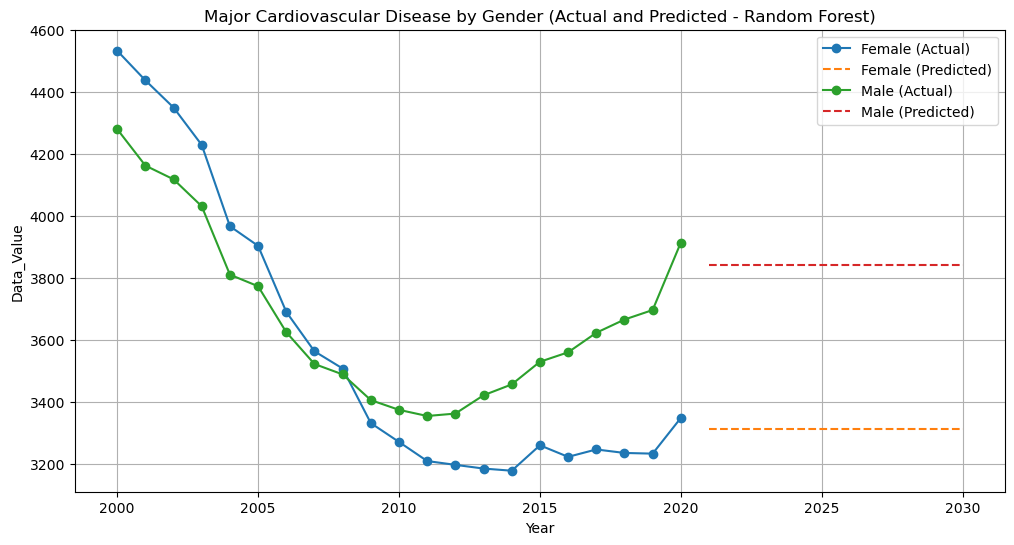

{'Female': {'MSE': 16429.45340230082, 'R^2': 0.9495133168351616},
 'Male': {'MSE': 10540.111151502173, 'R^2': 0.9062067874463913}}

In [80]:
# Analize and predict by Gender
analyze_and_predict(gender_filtered_df,'Major Cardiovascular Disease','Break_Out','Data_Value','Gender')

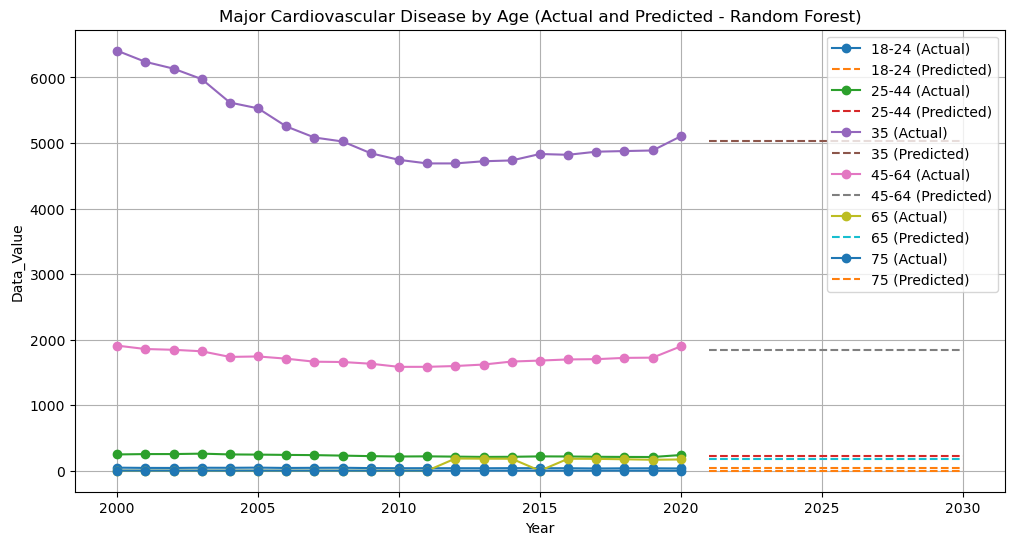

{'18-24': {'MSE': 5.853743346852193, 'R^2': 0.7108804065935068},
 '25-44': {'MSE': 18.369675511857174, 'R^2': 0.9292185586999218},
 '35': {'MSE': 31674.884115450648, 'R^2': 0.9350496802675321},
 '45-64': {'MSE': 1293.2600557396718, 'R^2': 0.8741356378812086},
 '65': {'MSE': 6674.460596535081, 'R^2': -0.27982793562349384},
 '75': {'MSE': 0.012297202712131732, 'R^2': 0.9514912967643471}}

In [81]:
analyze_and_predict(age_filtered_df,'Major Cardiovascular Disease','Break_Out','Data_Value','Age')

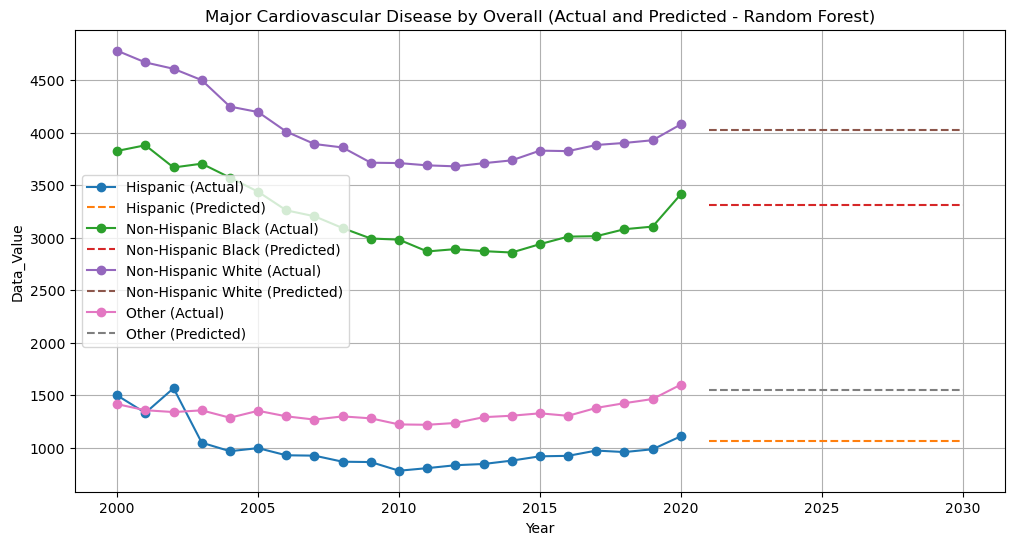

{'Hispanic': {'MSE': 3639.208095076769, 'R^2': 0.9420941534645345},
 'Non-Hispanic Black': {'MSE': 15403.637812955963, 'R^2': 0.9101218618731476},
 'Non-Hispanic White': {'MSE': 13712.437202469935, 'R^2': 0.9247649561018894},
 'Other': {'MSE': 1722.2559984200154, 'R^2': -0.05698400217888899}}

In [84]:
analyze_and_predict(race_filtered_df,'Major Cardiovascular Disease','Break_Out','Data_Value','Overall')

In [97]:
def analyze_and_predict_linear(df, topic, breakout_column, value_column,title, years_ahead=10):
    # Filter data for relevant topic
    filtered_data = df[df['Topic'] == topic]

    # Aggregate the data by year and breakout column
    aggregated_data = filtered_data.groupby(['YearStart', breakout_column])[value_column].mean().unstack()

    # Plot the trends of occurrences by breakout column over the years
    plt.figure(figsize=(12, 6))
    for column in aggregated_data.columns:
        plt.plot(aggregated_data.index, aggregated_data[column], label=f'{column}', marker='o')
    plt.title(f'{topic} by {title} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Data Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Prepare the data for linear regression
    X = aggregated_data.index.values.reshape(-1, 1)
    models = {}
    predictions = {}
    accuracy_results = {}

    for column in aggregated_data.columns:
        y = aggregated_data[column].values

        # Create and train the linear regression model
        model = LinearRegression()
        model.fit(X, y)
        models[column] = model

        # Predict future values
        future_years = np.arange(aggregated_data.index.max() + 1, aggregated_data.index.max() + 1 + years_ahead).reshape(-1, 1)
        predictions[column] = model.predict(future_years)

        # Plot the historical data along with the predictions
        plt.figure(figsize=(12, 6))
        plt.plot(aggregated_data.index, aggregated_data[column], label=f'{column} (Actual)', marker='o')
        plt.plot(future_years, predictions[column], label=f'{column} (Predicted)', linestyle='--')
        plt.title(f'{topic} by {title} (Actual and Predicted)')
        plt.xlabel('Year')
        plt.ylabel('Average Data Value')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Predict on the historical data
        predicted_historical = model.predict(X)

        # Calculate prediction accuracy
        mse = mean_squared_error(y, predicted_historical)
        r2 = r2_score(y, predicted_historical)
        accuracy_results[column] = {'MSE': mse, 'R^2': r2}

    return accuracy_results



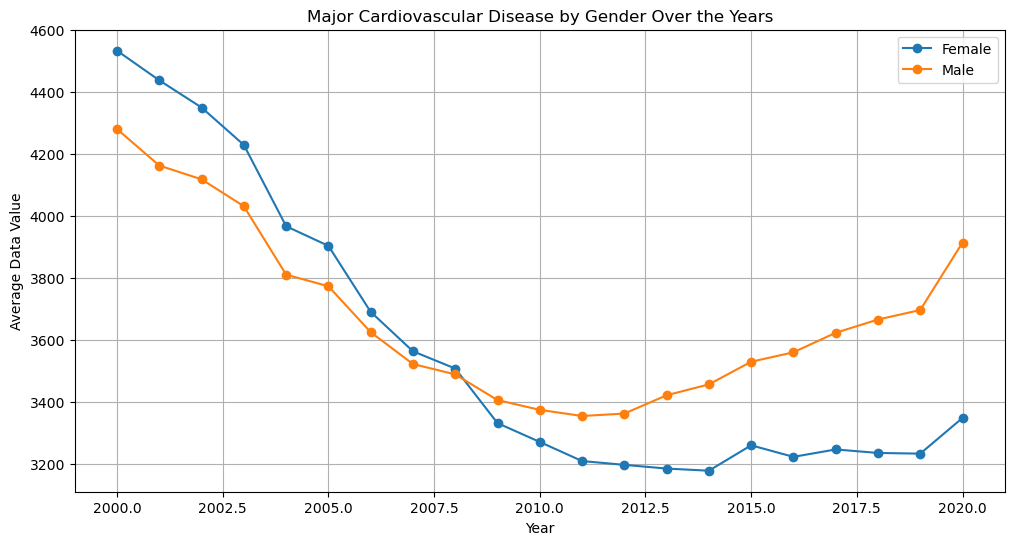

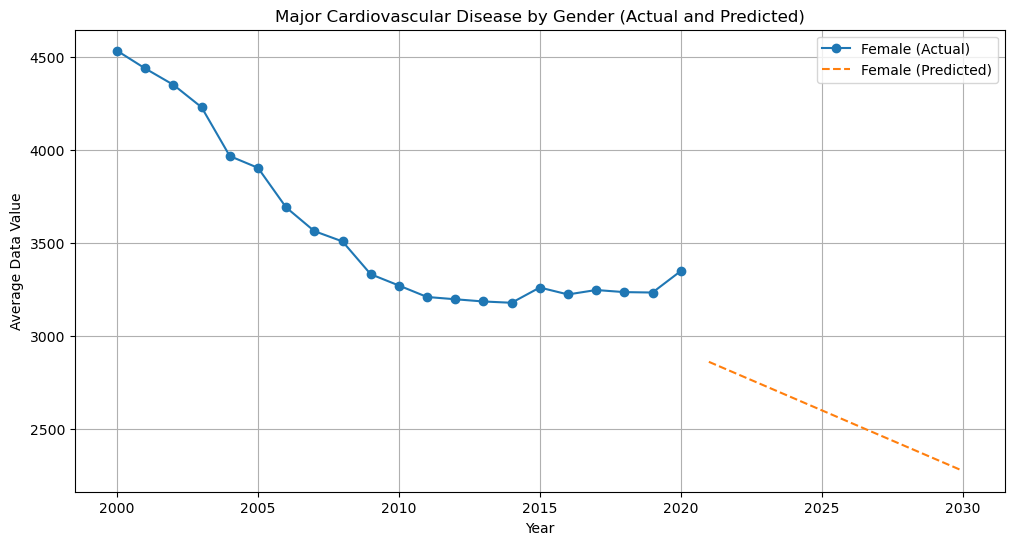

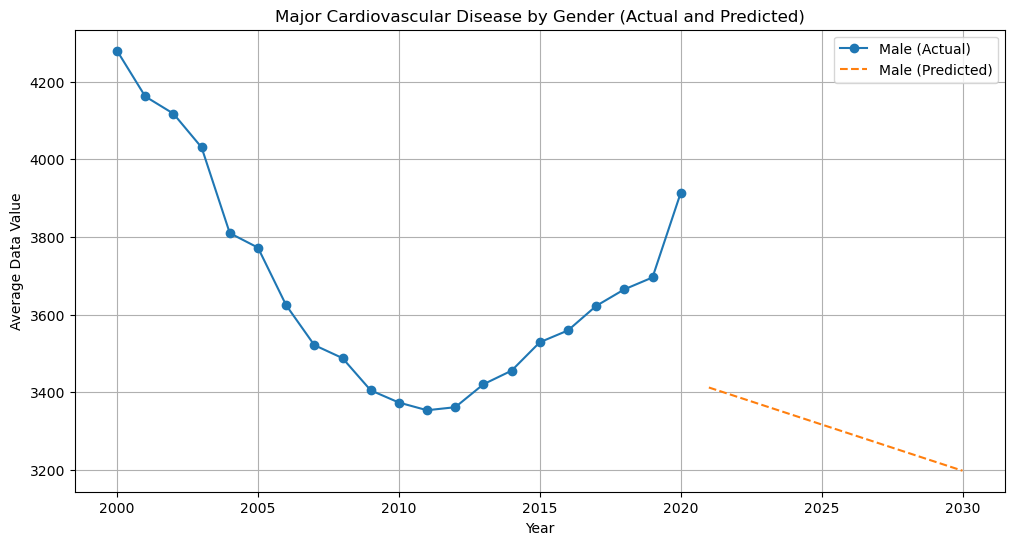

{'Female': {'MSE': 50659.22008559989, 'R^2': 0.7538779644529576}, 'Male': {'MSE': 54726.15559724909, 'R^2': 0.27527605590424364}}


In [100]:
accuracy_gender_linear = analyze_and_predict_linear(gender_filtered_df, 'Major Cardiovascular Disease', 'Break_Out', 'Data_Value','Gender')
print(accuracy_gender_linear)

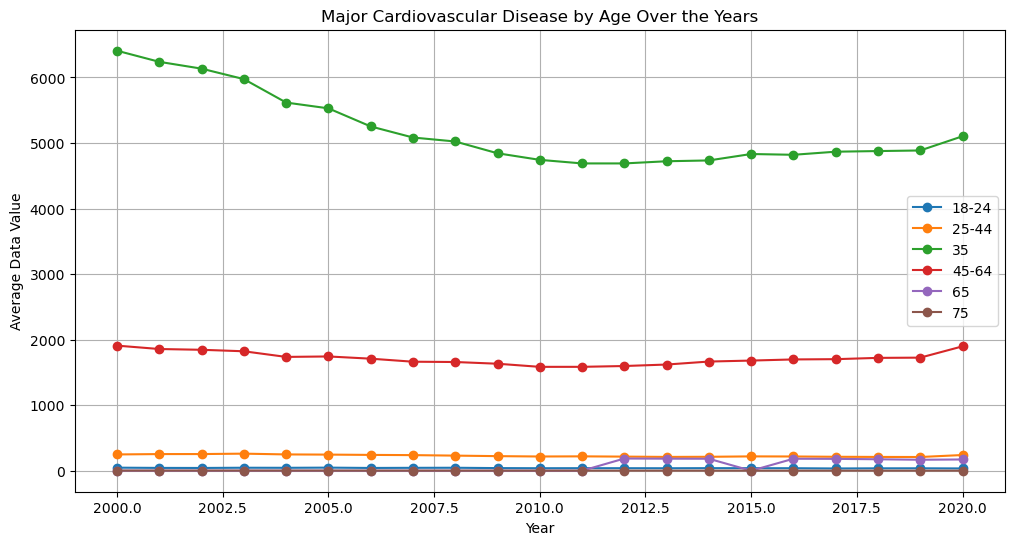

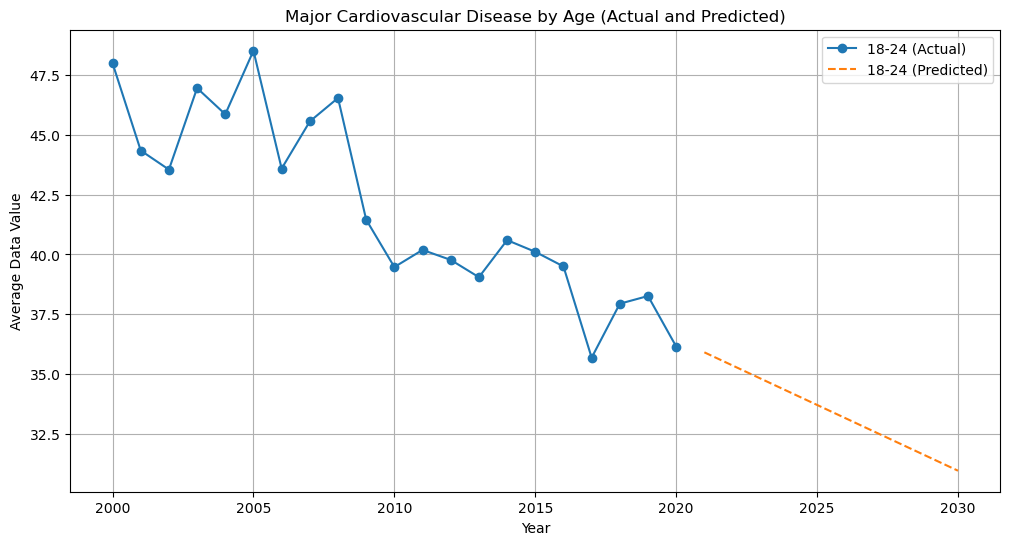

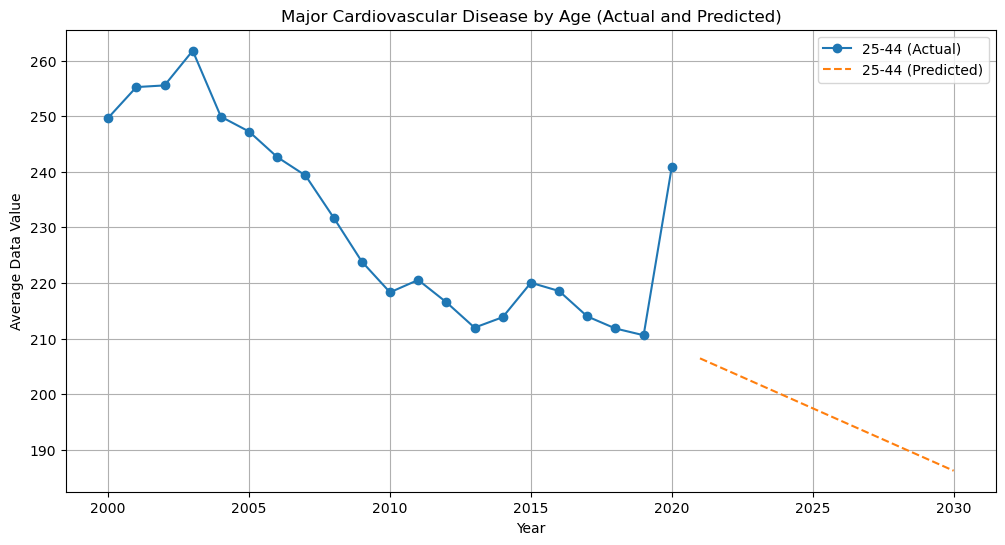

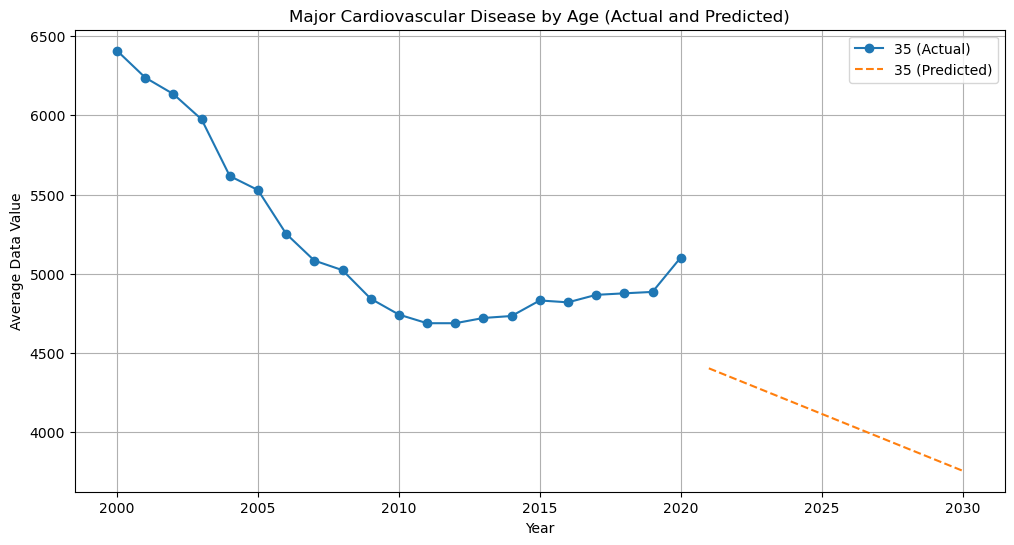

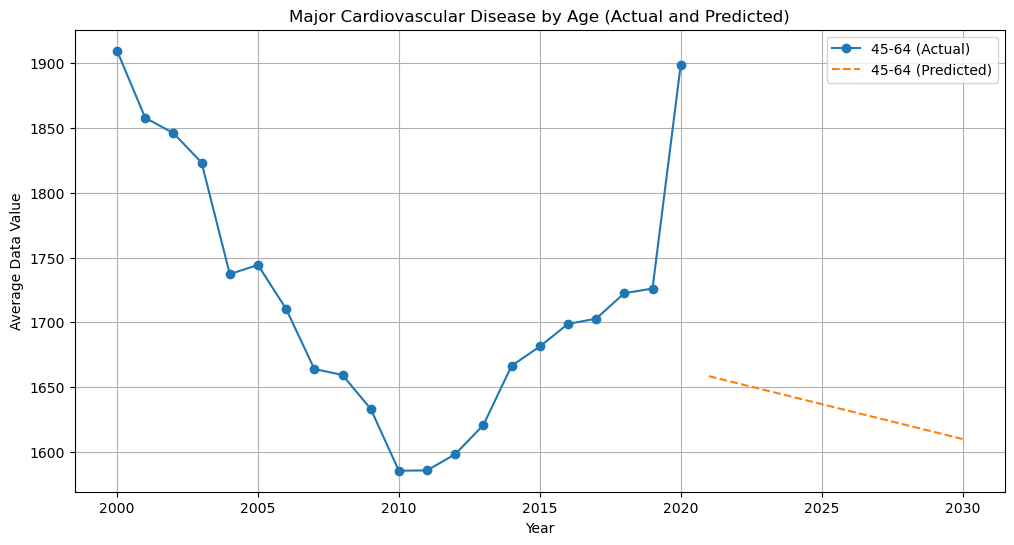

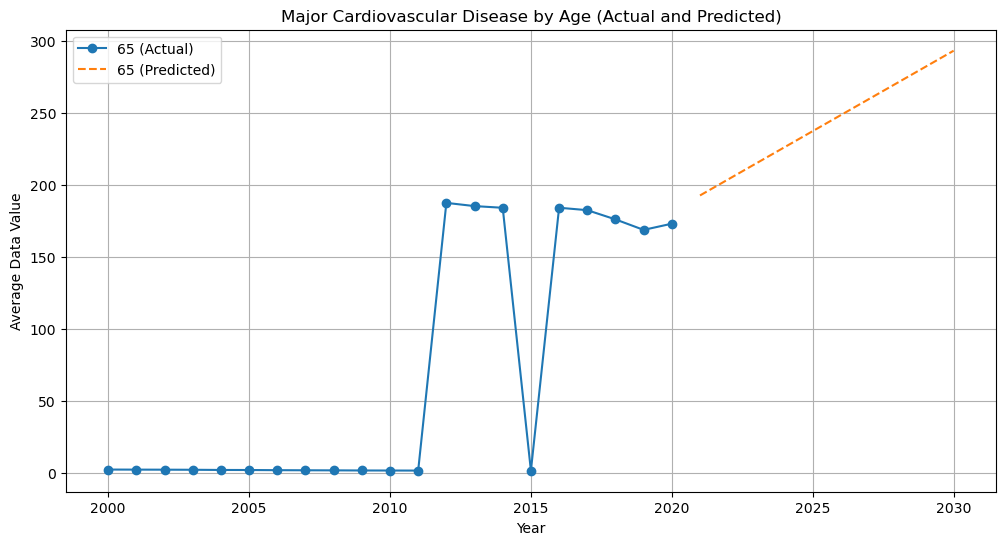

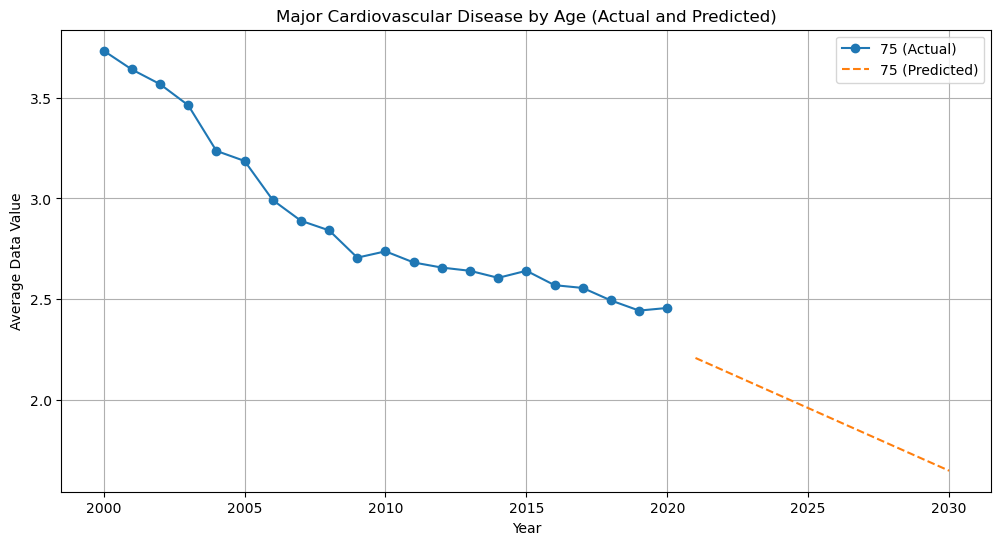

{'18-24': {'MSE': 3.2728675773283706, 'R^2': 0.7722493739894172}, '25-44': {'MSE': 98.2081931563285, 'R^2': 0.6531269027839188}, '35': {'MSE': 108433.83259479413, 'R^2': 0.6353043315121727}, '45-64': {'MSE': 8179.1673556373335, 'R^2': 0.1148603494761451}, '65': {'MSE': 2936.663394926353, 'R^2': 0.6090771399346052}, '75': {'MSE': 0.02009987480207923, 'R^2': 0.8760713606320418}}


In [101]:
accuracy_age_linear = analyze_and_predict_linear(age_filtered_df, 'Major Cardiovascular Disease', 'Break_Out', 'Data_Value','Age')
print(accuracy_age_linear)

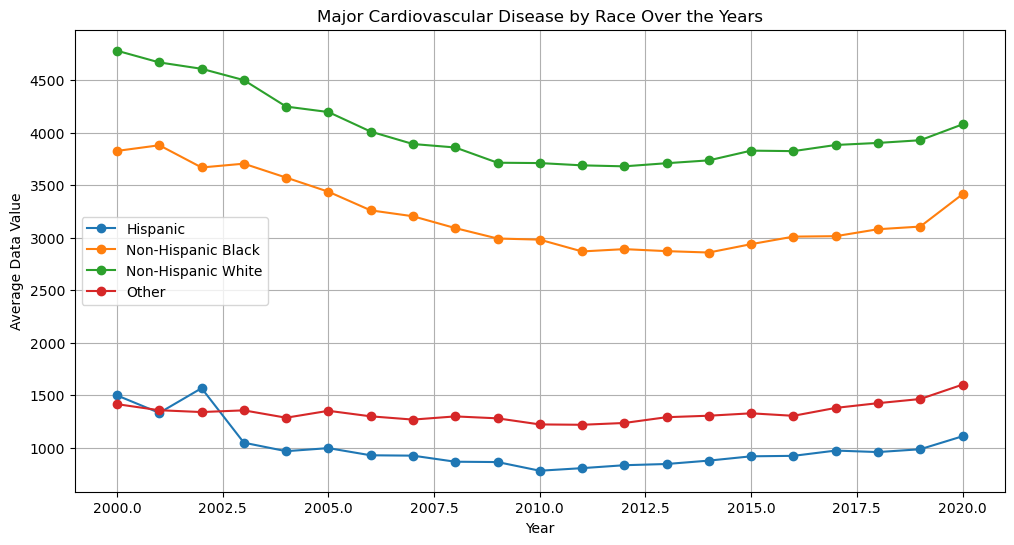

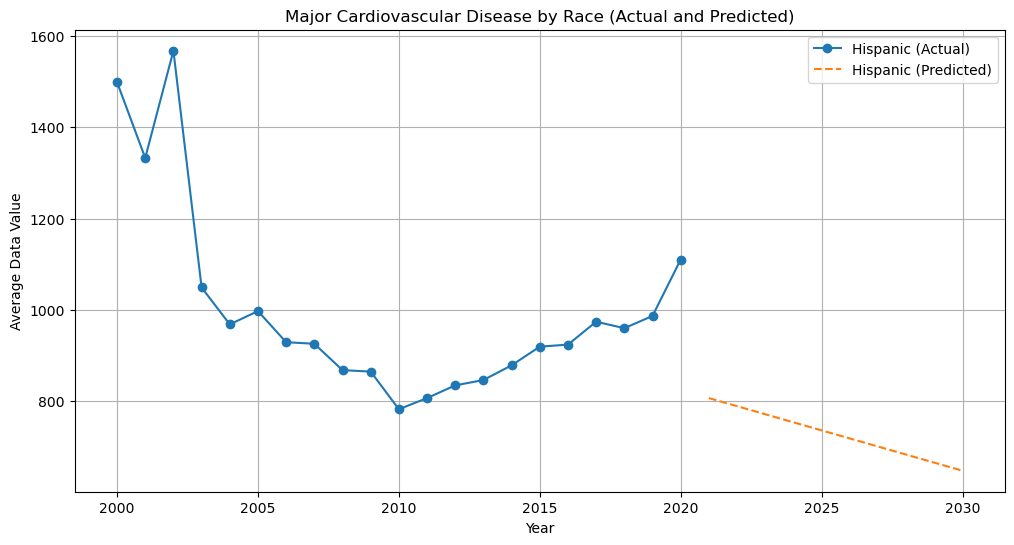

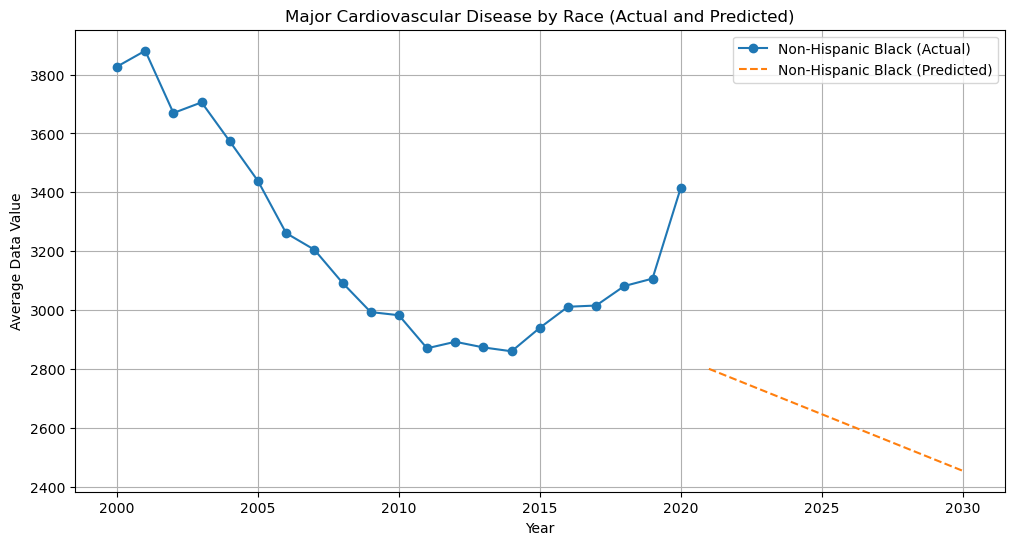

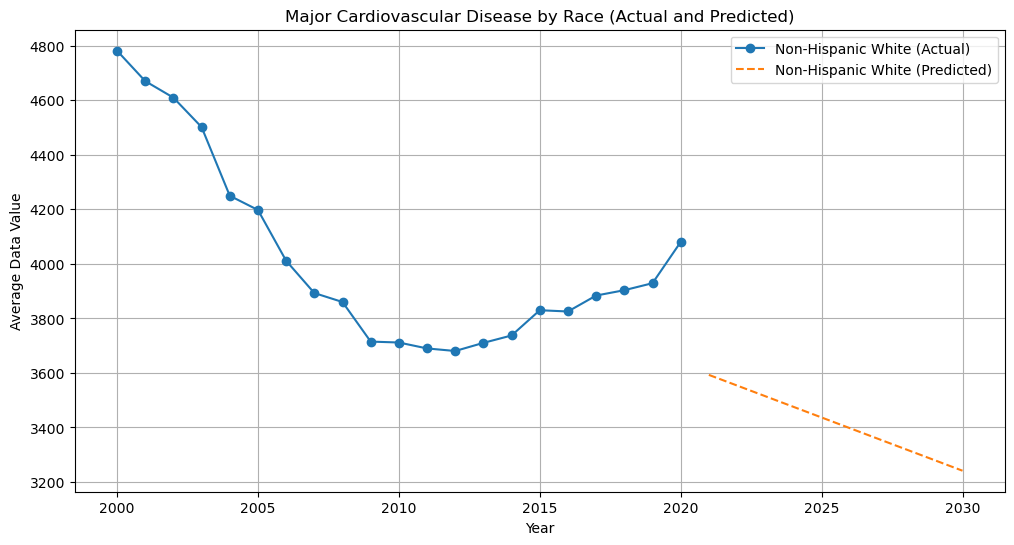

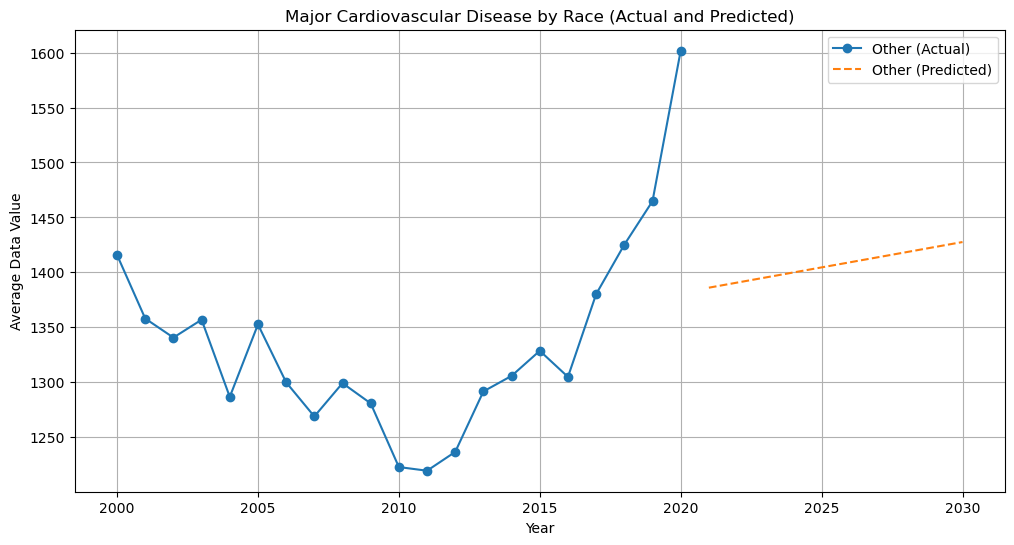

{'Hispanic': {'MSE': 31864.097096462203, 'R^2': 0.2647205003231141}, 'Non-Hispanic Black': {'MSE': 53180.43237278996, 'R^2': 0.5051724439107923}, 'Non-Hispanic White': {'MSE': 59037.40940586401, 'R^2': 0.4863337833037761}, 'Other': {'MSE': 6718.043321647318, 'R^2': 0.10415270702596846}}


In [103]:
accuracy_race_linear = analyze_and_predict_linear(race_filtered_df, 'Major Cardiovascular Disease', 'Break_Out', 'Data_Value','Race')
print(accuracy_race_linear)

In [54]:
df.info

<bound method DataFrame.info of         YearStart LocationAbbr                    Class  \
0            2000           AL  Cardiovascular Diseases   
1            2000           AL  Cardiovascular Diseases   
2            2000           AL  Cardiovascular Diseases   
3            2000           AL  Cardiovascular Diseases   
4            2000           AL  Cardiovascular Diseases   
...           ...          ...                      ...   
174715       2020           US  Cardiovascular Diseases   
174716       2020           US  Cardiovascular Diseases   
174717       2020           US  Cardiovascular Diseases   
174718       2020           US  Cardiovascular Diseases   
174719       2020           US  Cardiovascular Diseases   

                               Topic  Data_Value Break_Out_Category  \
0       Major Cardiovascular Disease      5082.0            Overall   
1       Major Cardiovascular Disease      5256.0            Overall   
2       Major Cardiovascular Disease      5149

In [55]:
overall_filtered_df.head()

,YearStart,LocationAbbr,Class,Topic,Data_Value,Break_Out_Category,Break_Out,Data_Value_TypeID
1,2000,AL,Cardiovascular Diseases,Major Cardiovascular Disease,5256.0,Overall,Overall,Crude
20,2000,AK,Cardiovascular Diseases,Major Cardiovascular Disease,1871.0,Overall,Overall,Crude
41,2000,AZ,Cardiovascular Diseases,Major Cardiovascular Disease,3724.0,Overall,Overall,Crude
60,2000,AR,Cardiovascular Diseases,Major Cardiovascular Disease,5546.0,Overall,Overall,Crude
81,2000,CA,Cardiovascular Diseases,Major Cardiovascular Disease,3734.0,Overall,Overall,Crude


In [56]:
value_counts = filtered_df['YearStart'].value_counts()
print(value_counts)

YearStart
2020    4483
2019    4458
2018    4433
2016    4431
2017    4427
2015    4416
2014    4388
2006    4369
2013    4368
2012    4360
2001    4358
2011    4354
2002    4353
2000    4352
2003    4352
2005    4351
2007    4348
2009    4343
2008    4343
2004    4339
2010    4338
Name: count, dtype: int64


In [57]:
# Number of columns per state per year
columns_per_state_year = 20

# Total number of states
num_states = 50

# Total number of years
num_years = 22

# Separating the dataset by blocks of columns for each state and year
blocks = []
for state_index in range(num_states):
    for year_index in range(num_years):
        start_col = (state_index * num_years * columns_per_state_year) + (year_index * columns_per_state_year)
        end_col = start_col + columns_per_state_year
        block = df.iloc[:, start_col:end_col]
        blocks.append(block)

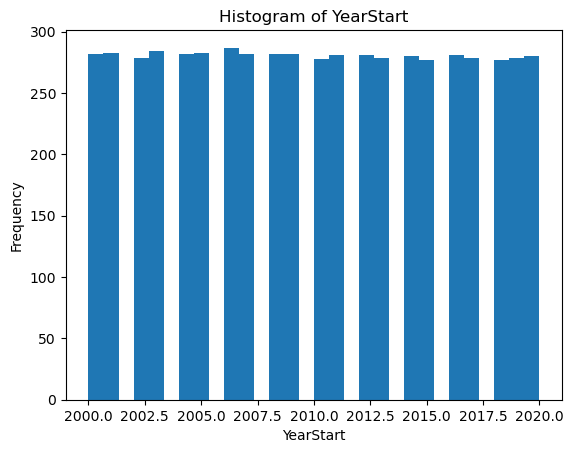

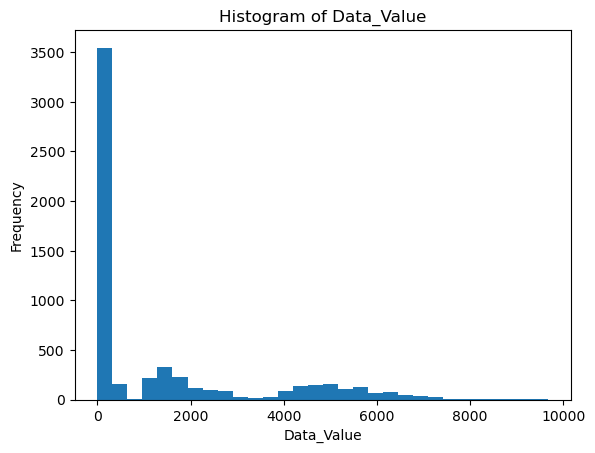

In [58]:
for column in age_filtered_df.select_dtypes(include='number').columns:
    plt.figure()
    plt.hist(age_filtered_df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [59]:
from sklearn.cluster import KMeans

In [60]:
# Example data preparation
data = overall_filtered_df[['Data_Value', 'Break_Out']]

# Ensure the data is numeric and drop rows with non-numeric values
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Verify the data
print(data.head())

# Define the number of clusters
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

# Get cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
overall_filtered_df = overall_filtered_df.loc[data.index]  # Ensure the DataFrame matches the cleaned data
overall_filtered_df['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with cluster coloring
plt.scatter(data['feature1'], data['feature2'], c=labels, cmap='viridis', marker='o', edgecolor='k')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6, marker='x', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

Empty DataFrame
Columns: [Data_Value, Break_Out]
Index: []


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by KMeans.